In [3]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    ## VS Codeで実行されている場合
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    !pip install ipynbname
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
    if "%2F" in THIS_NOTEBOOK_PATH.stem:
        ## Google Colabで実行されている場合
        colab_ip = %system hostname -I   # uses colab magic to get list from bash
        colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
        colab_port = 9000                # could use 6000, 8080, or 9000
        import requests
        filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
        THIS_NOTEBOOK_PATH = Path(filename)
    else:
        ## それ以外の場合
        THIS_NOTEBOOK_PATH = THIS_NOTEBOOK_PATH

OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

In [4]:
print("File output directory:", OUTPUT_DIR)
# Create the output directory if it does not exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

File output directory: figures/_binary_tree


In [5]:
!pip install networkx


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


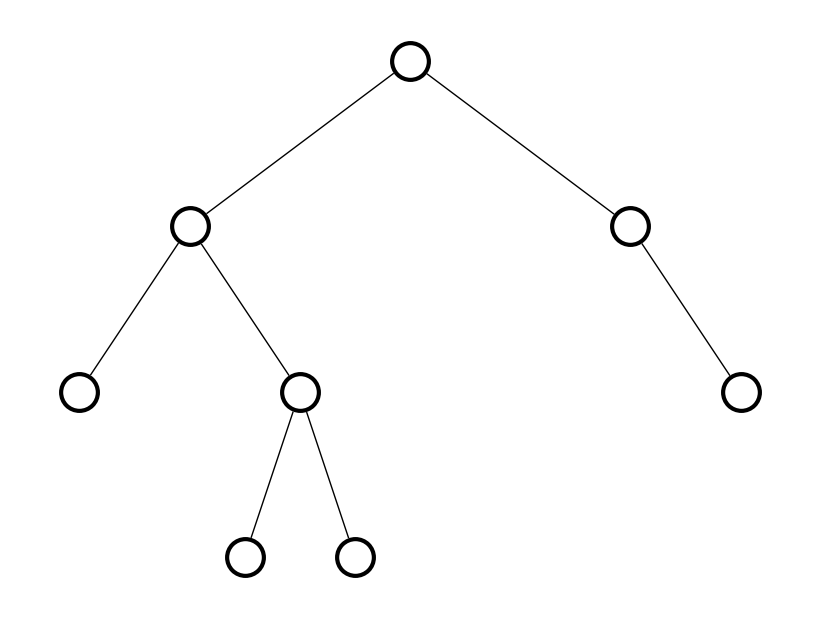

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path

# グラフの生成
G = nx.Graph()

# ノードの追加
nodes = ['root', 'left', 'right', 'left_left', 'left_right', 'left_right_left', 'left_right_right', 'right_right']
for node in nodes:
    G.add_node(node)

# エッジの追加
edges = [('root', 'left'), ('root', 'right'), 
         ('left', 'left_left'), ('left', 'left_right'), 
         ('left_right', 'left_right_left'), ('left_right', 'left_right_right'),
         ('right', 'right_right')]
G.add_edges_from(edges)

# ノードの位置の設定
pos = {
    'root': (0, 4),
    'left': (-1, 3), 'right': (1, 3),
    'left_left': (-1.5, 2), 'left_right': (-0.5, 2),
    'left_right_left': (-0.75, 1), 'left_right_right': (-0.25, 1),
    'right_right': (1.5, 2)
}

# プロットの設定
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_size=700, node_color="white", edge_color="black", linewidths=3)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="white", edgecolors='black', linewidths=3)

# 保存と表示
output_path = Path(OUTPUT_DIR / 'binary_tree.png')
output_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
plt.show()
plt.show()